In [1]:
!pip install uncertainties
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import arange
import statistics
import math
import pandas as pd
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp
from google.colab import files
from IPython.display import Image
from uncertainties import unumpy
from scipy.optimize import curve_fit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 3.2 MB/s eta 0:00:00


#Versuch 7: Wechselstromkreise - Robin Hoffmann

##Aufgabe 1: Teifpassfilter

In der ersten Aufgabe wird ein Tiefpassfilter auf der Steckplatine gebaut. Dieser dämpft hohe Frequenzen ab und überträgt tiefe Frequenzen. Hierzu wird ein Kondensator mit der Kapazität $C = (2,2±0,3)µF$ in Reihe mit einem Widerstand $R = (10±0,1)kΩ$ geschaltet und an die Spannungsquelle
$U = 3,3V$ des iOLab-Geräts angeschlossen, wie in Abbildung 1 dargestellt.

In [2]:
#uploaded = files.upload()
Image('Sp1.png', width = 300)

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

Abbildung 1: Aufbau des Tiefpassfilters mit den Bauelementen: Widerstand R, Kondensator C, der Spannungsquelle U und dem Sensor A1.

Die zeitliche Entladung des Kondensators kann mit der folgenden Formel beschrieben werden:

$V_{out}(t) = V_{out}(0) \cdot e^{\frac{-t}{RC}}$

Um die Zeitkonstante $τ = RC$ abzuschätzen, werden 12 Wertepaare (siehe Tabelle 1) aus der Kurve (siehe Abbildung 2) die durch die Entladung des Kondensators entsteht, abgelesen. Und es wird eine lineare Anpassung erstellt um $τ$ zu ermitteln, hierzu muss die obige Gleichung allerdings noch linearisiert werden:

$\ln({\frac{V_{out}(t)}{V_{out}(0)}}) = -\frac{t}{\tau}$



$$
\begin{aligned}
& \text {Tabelle 1: In der folgenden Tabelle sind die Wertepaare aus Spannung $V_{out}$ und Zeitpunkt $t$ nach Start der Entladung t: }\\
&\begin{array}{ccc}
\hline \hline \text {Messung} & \text {$V_{out}$(t) in V} & \text {Zeitpunkt t in s} \\
\hline 
0 & 3.000±0.002 & 0.00±0.005 \\
1 & 2.966±0.002 & 0.01±0.005 \\
2 & 2.032±0.002 & 0.02±0.005 \\
3 & 1.338±0.002 & 0.03±0.005 \\
4 & 0.886±0.002 & 0.04±0.005 \\
5 & 0.591±0.002 & 0.05±0.005 \\
6 & 0.398±0.002 & 0.06±0.005 \\
7 & 0.270±0.002 & 0.07±0.005 \\
8 & 0.186±0.002 & 0.08±0.005 \\
9 & 0.129±0.002 & 0.09±0.005 \\
10 & 0.092±0.002 & 0.10±0.005 \\
11 & 0.066±0.002 & 0.11±0.005 \\
12 & 0.049±0.002 & 0.12±0.005 \\
\hline
\end{array}
\end{aligned} 
$$

In [3]:
#uploaded = files.upload()
Image('Data1.png', width = 500)

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

Abbildung 2: Zeitliche Entladung des Kondensators

a = -37.84+/-0.27
b = 0.3073+/-0.0015




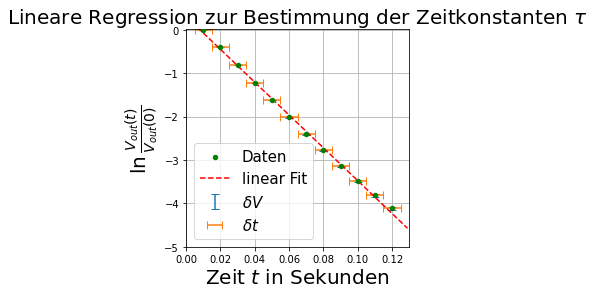

In [11]:
t1 = ufloat(0.01, 0.005)  #Zeit-Werte eintragen
t2 = ufloat(0.02, 0.005)
t3 = ufloat(0.03, 0.005)
t4 = ufloat(0.04, 0.005)
t5 = ufloat(0.05, 0.005)
t6 = ufloat(0.06, 0.005)
t7 = ufloat(0.07, 0.005)
t8 = ufloat(0.08, 0.005)
t9 = ufloat(0.09, 0.005)
t10 = ufloat(0.10, 0.005)
t11 = ufloat(0.11, 0.005)
t12 = ufloat(0.12, 0.005)

V0 = ufloat(3, 0.002) #Vin(0)

V1 = ufloat(2.966, 0.002) #Spannungswerte eintragen
V2 = ufloat(2.032, 0.002)
V3 = ufloat(1.338, 0.002)
V4 = ufloat(0.886, 0.002)
V5 = ufloat(0.591, 0.002)
V6 = ufloat(0.398, 0.002)
V7 = ufloat(0.27, 0.002)
V8 = ufloat(0.186, 0.002)
V9 = ufloat(0.129, 0.002)
V10 = ufloat(0.092, 0.002)
V11 = ufloat(0.066, 0.002)
V12 = ufloat(0.049, 0.002)

t_array = np.array([t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12])
V_array = np.array([V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12])

V_ln_array = np.array([])
for i in range(len(V_array)):
  x = unp.log(V_array[i]/V0)
  V_ln_array = np.append(V_ln_array, x)

#print(V_ln_array)

V_ln_array_value = np.array([])
V_ln_array_error = np.array([])
t_array_value = np.array([])
t_array_error = np.array([])

for i in range(len(V_array)):
  V_ln_array_value = np.append(V_ln_array_value, V_ln_array[i].nominal_value)
  V_ln_array_error = np.append(V_ln_array_error, V_ln_array[i].std_dev)
  t_array_value = np.append(t_array_value, t_array[i].nominal_value)
  t_array_error = np.append(t_array_error, t_array[i].std_dev)

#print(V_ln_array_value) #ausgabe linearisierte Werte von V(t)
#print(V_ln_array_error) #ausgabe linearisierte Fehlerwerte von V(t)

def linF(x, a,b):
    return a*x + b 
  
fig, axs = plt.subplots(1,1,figsize=(4, 4));
plt.scatter(t_array_value, V_ln_array_value, label = 'Daten', color='green', s=20, zorder= 5)
axs.errorbar(t_array_value,V_ln_array_value,yerr = V_ln_array_error,linestyle='none',capsize = 4, label = r'$δV$');
axs.errorbar(t_array_value,V_ln_array_value,xerr = t_array_error,linestyle='none',capsize = 4, label = r'$δt$');
sc.optimize.curve_fit(linF, t_array_value, V_ln_array_value, absolute_sigma=True)
popt, pcov = sc.optimize.curve_fit(linF, t_array_value, V_ln_array_value)
a, b = popt
#print('y = %.5f * x + %.5f \n' % (a, b)) #ausgabe Geradengleiuchung

x_line = arange(0, max(t_array_value)+0.01, 0.001)
y_line = linF(x_line, a, b)
perr = np.diag(pcov)
a1 = ufloat(a, perr[0])
b1 = ufloat(b, perr[1])
plt.plot(x_line, y_line, '--', color='red', label = 'linear Fit')

print('a =', a1)
print('b =', b1)

tau = -1/a1
#print('tau =', tau)

print('\n')




axs.set_xlabel(r'Zeit $t$ in Sekunden', fontsize = 20);
axs.set_ylabel(r'$\ln{\frac{V_{out}(t)}{V_{out}(0)}}$', fontsize = 20);

axs.legend(loc = 'lower left',fontsize=15)

plt.axis([0, max(t_array_value)+0.01, -5, 0.01]) #Achsenanpassung
plt.title(r'Lineare Regression zur Bestimmung der Zeitkonstanten $\tau$', fontsize = 20)
plt.grid()

plt.show()

Abbildung 3: Diagramm in dem $\ln({\frac{V_{out}(t)}{V_{out}(0)}})$ über den gemessenen Zeitpunkt $t$ aufgetragenist. Die Steigung entspricht hierbei dann genau $-\frac{1}{\tau}$. Es ergibt sich die Steigung $a = (-37,84±0.27) \frac{1}{s}$ für die linear gefittete Gerade. Daraus ergibt sich für $\tau$:

$\tau = -\frac{1}{a} = \frac{1}{(-37,84±0.27) \frac{1}{s}} = (0.02643±0.00019) s$

Der große Fehler der Zeit $\delta t$ ergibt sich aus der schlechten Auflösung der Daten im iOLab-Repository.

##Aufgabe 2: Sinussignal am Kondensator

Es soll ein elektrisches System charakterisiert werden. Hierzu wird am Eingang der Schaltung ein Sinussignal angelegt welches durch einen Ton Generator erzeugt wird. Dann wird am Ausgang der Schaltung (siehe Abbildung 4) gemessen.


In [5]:
#uploaded = files.upload()
Image('Sp2.png', width = 300)

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

Abbildung 4: Sinusgenerator angeschlossen an den Tiefpassfilter aus Aufgabe 1. Gemessen mit A1- und A2-Sensor des iOLabs.

In [6]:
#uploaded = files.upload()
Image('Data2.png', width = 500)

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

Abbildung 5: Amplituden und Zeitdifferenz der Schwingungen.

Nun wurden für die Frequenzen f1 = 1Hz, f2 = 3Hz, f3 = 7Hz, f4 = 10Hz, f5 = 20Hz
jeweils die Phasenzeitdifferenz und Spannung gemessen. Der Fehler ergibt sich aus der Auflösung dder Messdaten (siehe Tabelle 2).

$$
\begin{aligned}
& \text {Tabelle 2: Es sind die fünf Frequenzen 1,3,7,10 und 20 Hz und die zugehörige Phasenverschiebung, sowie die Eingangs- und Ausgangsspannung aufgelistet}\\
&\begin{array}{cccccc}
\hline \hline \text {Frequenz in Hz} & \text {Kreisfrequenz $\omega$ in $\frac{1}{s}$} & \text {Phasenverschiebung $\Delta t$ in s} & \text {$V_{in}$ in V} & \text {$V_{out}$ in V}\\
\hline 
1 & 2\pi & 0.025±0.004 & 1.042±0.001 & 1.028±0.001 \\
3 & 6\pi & 0.020±0.004 & 1.358±0.003 & 1.236±0.001\\
7 & 14\pi & 0.015±0.004 & 1.406±0.002 & 1.003±0.002\\
10 & 20\pi & 0.015±0.004 & 1.403±0.002 & 0.837±0.001\\
20 & 40\pi & 0.010±0.004 & 1.390±0.003 & 0.468±0.001\\
\hline
\end{array}
\end{aligned} 
$$

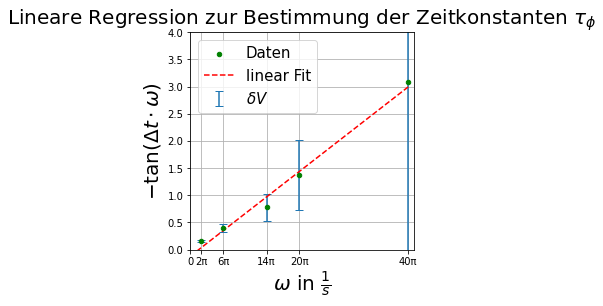

In [7]:
delta_t1_1Hz = ufloat(0.025, 0.005) 
delta_t2_1Hz = ufloat(0.025, 0.005) 
Vin_max_1Hz = ufloat(1.042, 0.001) 
Vout_max_1Hz = ufloat(1.028, 0.001) 

delta_t1_3Hz = ufloat(0.02, 0.005) 
delta_t2_3Hz = ufloat(0.02, 0.005) 
Vin_max_3Hz = ufloat(1.358, 0.003) 
Vout_max_3Hz = ufloat(1.236, 0.001) 

delta_t1_7Hz = ufloat(0.015, 0.005) 
delta_t2_7Hz = ufloat(0.015, 0.005) 
Vin_max_7Hz = ufloat(1.406, 0.002) 
Vout_max_7Hz = ufloat(1.003, 0.002) 

delta_t1_10Hz = ufloat(0.015, 0.005) 
delta_t2_10Hz = ufloat(0.015, 0.005) 
Vin_max_10Hz = ufloat(1.403, 0.002) 
Vout_max_10Hz = ufloat(0.837, 0.001) 

delta_t1_20Hz = ufloat(0.01, 0.005) 
delta_t2_20Hz = ufloat(0.01, 0.005) 
Vin_max_20Hz = ufloat(1.39, 0.003) 
Vout_max_20Hz = ufloat(0.468, 0.001)

delta_t1_array = np.array([delta_t1_1Hz, delta_t1_3Hz, delta_t1_7Hz, delta_t1_10Hz, delta_t1_20Hz])
delta_t2_array = np.array([delta_t2_1Hz, delta_t2_3Hz, delta_t2_7Hz, delta_t2_10Hz, delta_t2_20Hz])
average_delta_t_array = np.array([])

for i in range(len(delta_t1_array)):
  x = (delta_t1_array[i] + delta_t2_array[i])/2
  average_delta_t_array = np.append(average_delta_t_array, x)

#print(average_delta_t_array[1])
circular_frequency_array= np.array([2*math.pi, 6*math.pi, 14*math.pi, 20*math.pi, 40*math.pi,])

tan_array = np.array([])
for i in range(len(average_delta_t_array)):
  x = -unp.tan(-average_delta_t_array[i] * circular_frequency_array[i])
  tan_array = np.append(tan_array, x)

#print(tan_array) #print tan-values

tan_array_value = np.array([])
tan_array_error = np.array([])

for i in range(len(tan_array)):
  tan_array_value = np.append(tan_array_value, tan_array[i].nominal_value)
  tan_array_error = np.append(tan_array_error, tan_array[i].std_dev)

def linF(x, a,b):
    return a*x + b 
  
fig, axs = plt.subplots(1,1,figsize=(4, 4));
plt.scatter(circular_frequency_array, tan_array_value, label = 'Daten', color='green', s=20, zorder= 5)
axs.errorbar(circular_frequency_array,tan_array_value,yerr = tan_array_error,linestyle='none',capsize = 4, label = r'$δV$');
sc.optimize.curve_fit(linF, circular_frequency_array, tan_array_value, absolute_sigma=True)
popt, pcov = sc.optimize.curve_fit(linF, circular_frequency_array, tan_array_value)
a, b = popt
#print('y = %.5f * x + %.5f \n' % (a, b)) #ausgabe Geradengleiuchung

x_line = arange(0, max(circular_frequency_array)+0.01, 0.001)
y_line = linF(x_line, a, b)
perr = np.diag(pcov)
a1 = ufloat(a, perr[0])
b1 = ufloat(b, perr[1])
plt.plot(x_line, y_line, '--', color='red', label = 'linear Fit')

#print('a =', a1)
#print('b =', b1)

tau = a1
#print('tau_phi =', tau)

print('\n')




axs.set_xlabel(r'$\omega$ in $\frac{1}{s}$', fontsize = 20);
axs.set_ylabel(r'$-\tan(\Delta t \cdot \omega)$', fontsize = 20);

axs.legend(loc = 'upper left',fontsize=15)

plt.axis([0, max(circular_frequency_array)+math.pi, 0, 4]) #Achsenanpassung
plt.xticks([0, 2*math.pi, 6*math.pi, 14*math.pi, 20*math.pi, 40*math.pi], [0, '2π','6π','14π','20π','40π'])
plt.title(r'Lineare Regression zur Bestimmung der Zeitkonstanten $\tau_{\phi}$', fontsize = 20)
plt.grid()

plt.show()



Abbildung 6: Plot zur Bestimmung von der Zeitkonstante $\tau_{\phi}$ durch linearen Fit.

Da die Auflösung wieder sehr schlecht ist, wird der Fehler für große $\omega$ sehr groß. Für $\tau_{\phi}$ gilt hier:

Steigung $a = \tau_{\phi} = (0.024762±0.000003)s$

tau_V = 0.02191909+/-0.00000014




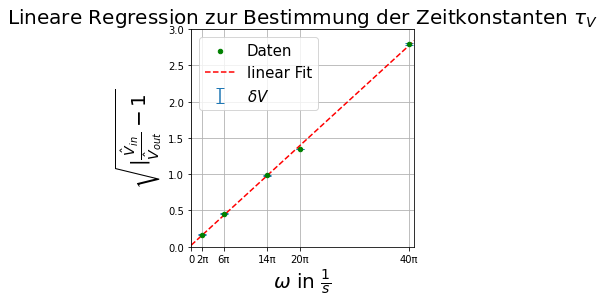

In [8]:
Vin_max_array   = np.array([Vin_max_1Hz, Vin_max_3Hz, Vin_max_7Hz, Vin_max_10Hz, Vin_max_20Hz])
Vout_max_array = np.array([Vout_max_1Hz, Vout_max_3Hz, Vout_max_7Hz, Vout_max_10Hz, Vout_max_20Hz])

uglyFormular_array = np.array([])
for i in range(len(Vin_max_array)):
  x = unp.sqrt((Vin_max_array[i] / Vout_max_array[i])**2 -1)
  uglyFormular_array = np.append(uglyFormular_array, x)

#print(uglyFormular_array) #print values

uglyFormular_array_value = np.array([])
uglyFormular_array_error = np.array([])

for i in range(len(tan_array)):
  uglyFormular_array_value = np.append(uglyFormular_array_value, uglyFormular_array[i].nominal_value)
  uglyFormular_array_error = np.append(uglyFormular_array_error, uglyFormular_array[i].std_dev)
 
def linF(x, a,b):
    return a*x + b 
  
fig, axs = plt.subplots(1,1,figsize=(4, 4));
plt.scatter(circular_frequency_array, uglyFormular_array_value, label = 'Daten', color='green', s=20, zorder= 5)
axs.errorbar(circular_frequency_array,uglyFormular_array_value,yerr = uglyFormular_array_error,linestyle='none',capsize = 4, label = r'$δV$');
sc.optimize.curve_fit(linF, circular_frequency_array, uglyFormular_array_value, absolute_sigma=True)
popt, pcov = sc.optimize.curve_fit(linF, circular_frequency_array, uglyFormular_array_value)
a, b = popt
#print('y = %.5f * x + %.5f \n' % (a, b)) #ausgabe Geradengleiuchung

x_line = arange(0, max(circular_frequency_array)+10, 0.001)
y_line = linF(x_line, a, b)
perr = np.diag(pcov)
a1 = ufloat(a, perr[0])
b1 = ufloat(b, perr[1])
plt.plot(x_line, y_line, '--', color='red', label = 'linear Fit')

#print('a =', a1)
#print('b =', b1)

tau = a1
print('tau_V =', tau)

print('\n')




axs.set_xlabel(r'$\omega$ in $\frac{1}{s}$', fontsize = 20);
axs.set_ylabel(r'$\sqrt{\vert{\frac{\hat{V}_{in}}{\hat{V}_{out}}} - 1}$', fontsize = 20);

axs.legend(loc = 'upper left',fontsize=15)

plt.axis([0, max(circular_frequency_array)+math.pi, 0, 3]) #Achsenanpassung
plt.xticks([0, 2*math.pi, 6*math.pi, 14*math.pi, 20*math.pi, 40*math.pi], [0, '2π','6π','14π','20π','40π'])
plt.title(r'Lineare Regression zur Bestimmung der Zeitkonstanten $\tau_{V}$', fontsize = 20)
plt.grid()

plt.show()



Abbildung 7: Plot zur Bestimmung von der Zeitkonstante $\tau_{V}$ durch linearen Fit.

Da die Auflösung wieder sehr schlecht ist, wird der Fehler für große $\omega$ sehr groß. Für $\tau_{V}$ gilt hier:

Steigung $a = \tau_{V} = (0.02191909±0.00000014)s$

Beide Werte liegen im Fehlerbereich des theoretischen Werts $τ_{theo} = RC = (0,022±0,003)s$ wodurch wir unsere ermittelten Werte bestätigen können.

##Aufgabe 3: Resonante RLC-Schaltung

Nun wurde ein Widerstand R = (10 ± 0, 5)Ω in Reihe mit dem Kondensator C = (2,2 ± 0, 3)µF
und einer Spule mit L = (100 ± 0, 5) mH in Reihe geschaltet und Frequenzen von 1
bis 600Hz abgespielt. Für die Messungen werden hierbei die Highgain-Sensoren G+ und G- verwendet.

In [9]:
#uploaded = files.upload()
Image('Data3.png', width = 500)

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

Abbildung 7: Der Ton Generator wurde an den Schaltkreis angeschlossen und die
Frequenzen stetig ansteigend abgespielt, dieser Anstieg wurde dann durch die Highgain Sensoren gemessen. Mit dem FWHM konnten dann die
Frequenzen bei den gewünschten Amplituden ermittelt werden.

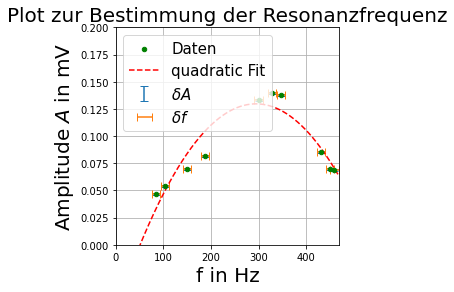

In [10]:
F1 = ufloat(328.042, 9) 
F2 = ufloat(149.962, 9) 
F3 = ufloat(449.887, 9) 
F4 = ufloat(299.924, 9) 
F5 = ufloat(346.788, 9) 
F6 = ufloat(187.453, 9) 
F7 = ufloat(103.099, 9)
F8 = ufloat(431.141, 9) 
F9 = ufloat(459.259, 9) 
F10 = ufloat(84.354, 9)  

A1 = ufloat(0.14, 0.001) 
A2 = ufloat(0.07, 0.001) 
A3 = ufloat(0.07, 0.001) 
A4 = ufloat(0.133, 0.001) 
A5 = ufloat(0.138, 0.001) 
A6 = ufloat(0.082, 0.001) 
A7 = ufloat(0.054, 0.001)
A8 = ufloat(0.085, 0.001) 
A9 = ufloat(0.069, 0.001) 
A10 = ufloat(0.047, 0.001) 

F_array   = np.array([F1, F2, F3, F4, F5, F6, F7, F8, F9, F10])
A_array   = np.array([A1, A2, A3, A4, A5, A6, A7, A8, A9, A10])

F_array_value = np.array([])
F_array_error = np.array([])
A_array_value = np.array([])
A_array_error = np.array([])

for i in range(len(F_array)):
  F_array_value = np.append(F_array_value, F_array[i].nominal_value)
  F_array_error = np.append(F_array_error, F_array[i].std_dev)
  A_array_value = np.append(A_array_value, A_array[i].nominal_value)
  A_array_error = np.append(A_array_error, A_array[i].std_dev)

def objective(x, a, b, c):
 return a * x**2 + b * x + c
  
fig, axs = plt.subplots(1,1,figsize=(4, 4));
plt.scatter(F_array_value, A_array_value, label = 'Daten', color='green', s=20, zorder= 5)
axs.errorbar(F_array_value,A_array_value,yerr = A_array_error,linestyle='none',capsize = 4, label = r'$δA$');
axs.errorbar(F_array_value,A_array_value,xerr = F_array_error,linestyle='none',capsize = 4, label = r'$δf$');
popt, _ = curve_fit(objective, F_array_value, A_array_value)
a, b, c = popt
#print('y = %.5f * x^2 + %.5f * x + %.5f \n' % (a, b, c)) #ausgabe Gleichung

x_line = arange(0, max(F_array_value)+10, 0.001)
y_line = objective(x_line, a, b, c)
perr = np.diag(pcov)
a1 = ufloat(a, perr[0])
b1 = ufloat(b, perr[1])
plt.plot(x_line, y_line, '--', color='red', label = 'quadratic Fit') #Plot quadratic fit (ugly)

print('\n')




axs.set_xlabel(r'f in Hz', fontsize = 20);
axs.set_ylabel(r'Amplitude $A$ in mV', fontsize = 20);

axs.legend(loc = 'upper left',fontsize=15)

plt.axis([0, max(F_array_value)+10, 0, 0.2]) #Achsenanpassung
plt.title(r'Plot zur Bestimmung der Resonanzfrequenz', fontsize = 20)
plt.grid()

plt.show()

Abbildung 8: Um den Peak der höchsten Amplitude zu ermitteln wurden 10 Messungen gemacht, von welchen die Frequenzen und Amplitude ermittelt wurden. Die Resonanzfrequenz ist $f_{res} = (328 ± 9) Hz.